# Does r/WallStreetBets Stocks Significantly Outperform?

Thanks to the prevalence of COVID-19 in our everyday lives, it's getting increasingly difficult to return to normal for most people. While I've used this additional flexibility to pick up on old hobbies (gaming, music, etc.), others have used theirs to learn about financial markets. Knowing that I work in finance, some of my friends have reached out to me for financial pointers, while others have opted for the convenience of reading r/WallStreetBets.

You may be asking, why am I -- someone who would be considered a "sophiscated investor" -- would even be interested in a platform such as r/WallStreetBets? For those of you who don't know, I've written a piece about the subreddit last year. However, it was never clearly explained the buzz around r/WallStreetBets.

Due to the pandemic (the financial insecurity and flexibility it brought to millions of people), as well as the stimulus checks provided by the government and the rise of free trading platforms such as Robinhood, a lot of people who would typically not dabble with stocks are having fun with the stock market. They're also investing in all sorts of zany things like Dogecoin and GameStop. Institutional Investors (the "smart money") and the veterans in the financial media fail to understand this, and they're generally condescending and negative towards these new brand of retail investors.

They call them idiots for taking risks in cryptocurrencies; they call them fools for believing companies in dying industries with falling revenues are great investments [2]. From this, the term "Dumb Money" was used to describe this new breed of investors; "DOGE/GME to the moon," they frequently chant, much to the disdain and confusion of legacy investors and their friends in the legacy media [3].

Recognizing the condescension, these retail investors decide to take their agency back using the self-described label known as Retards. Retards, if you don't know, is a rearrangement of the word tradeRS. Since they're not considered legitimate tradeRS in the eyes of the investment community, they'll just call themselves Retards, which is an anagram designed to reclaim the agency taken from retail investments. Sure, they may be considered "Dumb Money," but they're going to make the investment decisions they want to without the influence and manipulation of institutional investors and their friends in the financial media.

This is largely the energy behind drama involving r/WallStreetBets and the rest of the investment community.

## Should You Listen To r/WallStreetBets Stock Picks?

It is generally assumed -- rightly or wrongly -- that if you have a background in finance, you know what you're talking about. The barriers required to work within the industry seem to justify the claim. The most well-known front-end finance jobs require a bachelor's degree at an accredited four-year university, along with passing, at minimum, the Securities Industry Essentials Exam (or SIE) and either a FINRA Series 3 or 7 Exam.

Jobs that are more analytically driven, such as Actuaries, may require candidates to have a statistical or mathematical background and pass several SOA (Society of Actuaries) Exams. While Quants (which is my domain) typically don't require examinations; however, some positions do encourage and require candidates to have at minimum a Masters of Science in a STEM field.

So yes, it may be easy to see why the people who work on Wall Street are considered the "Smart Money."

However, this doesn't mean you need education and fancy certificates to make good investments. Warren Buffett, one of the greatest investors alive, began to invest on his own when he was only 11-years-old. While the man would never even look at any of the companies r/WallStreetBets are investing in, he established a system that allowed him to make sound investments using the resources available at the time; namely, a book published by Benjamin Graham called The Intelligent Investor. Speaking from personal experience, I started learning about finance and economics on my own time before I enrolled in university to pursue it as a career.

Today, the resources available to help retail investors are potentially endless. Most of what you'll find on the internet is bunk; however, you can find invaluable information if you know where to look.

This project aims to see if the Retards at r/WallStreetBets know where to look. Are they seeing things we aren't seeing or just larping as wall street speculators?

## Building a Portfolio

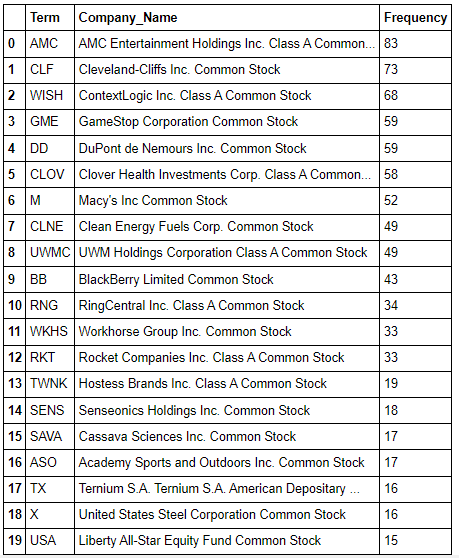

We will construct a portfolio using popular stocks from the WallStreetBets community. In July 2021, I decided to find the most talk-about stocks in the r/WallStreetBets subreddit and narrowed the list down to 20 of the most popular equities on the platform. Six of these assets have recently gone public, and they will be excluded from the experiment.

We're also going to include popular cryptocurrencies, such as Bitcoin and Dogecoin.

Now that we've identified all of the asset classes we will use, we need to establish an interval for our analysis. At a minimum, we need five years' worth of information, so the timeframe will be from January 1st, 2017, to today.

For the sake of simplicity and organzation, we're going to create a dictionary for our three financial instruments: `stocks`, `bonds` and `commodities`. Afterwards, we will assign each dictionary to their respective variables, and then assign these variables as elements for the creation a broader list called `tickers`. 

From there, using our clearly defined time interval, we will loop through each financial instrument in the list and use `DataReader` to extract the financial data from Yahoo Finance.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
from functools import reduce
from tabulate import tabulate
from matplotlib.ticker import FormatStrFormatter
import warnings

warnings.filterwarnings("ignore")


def display(data):
	print(tabulate(data, headers = 'keys', tablefmt = 'psql'))
	return

# 1 - Define `tickers` & `company names` for every instrument
stocks      = {'AMC':'AMC Entertainment', 'CLF':'Cleveland-Cliffs', 'BBBY':'Bed Bath and Beyond, Inc.', 'GME': 'GameStop', 'DD':'DuPoint de Nemours', 'M' : 'Macys', 'CLNE': 'Clean Energy Fuels Corp.', 'BB':'BlackBerry', 'RNG':'RingCentral', 'WKHS':'Workhorse Group', 'TWNK':'Hostess Brands', 'SENS':'Senseonics', 'SAVA':'Cassava Sciences', 'TX':'Ternium', 'USA':'Liberty All-Star Equity','X': 'US Steel Corp'}
bonds       = {'HCA' : 'HCA', 'VRTX' :  'VRTX'}
commodities = {'BTC-USD' : 'Bitcoin', 'DOGE-USD' : 'Dogecoin'}
instruments = {**stocks, **bonds, **commodities}
tickers     = list(instruments.keys())
instruments_data = {}
N = len(tickers)

# 2 - We will look at stock prices over the past years, starting at January 1, 2015
# 01-01-2015 - 16-04-2020
start = datetime.datetime(2017,1,1)
end = datetime.datetime.today()

# 3 - Let's get instruments data based on the tickers.
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
for ticker, instrument in instruments.items():
    print("Loading data series for instrument {} with ticker = {}".format(instruments[ticker], ticker))
    instruments_data[ticker] = web.DataReader(ticker, data_source = 'yahoo', start=start, end = end)
    
instruments_data['AMC']

Loading data series for instrument AMC Entertainment with ticker = AMC
Loading data series for instrument Cleveland-Cliffs with ticker = CLF
Loading data series for instrument Bed Bath and Beyond, Inc. with ticker = BBBY
Loading data series for instrument GameStop with ticker = GME
Loading data series for instrument DuPoint de Nemours with ticker = DD
Loading data series for instrument Macys with ticker = M
Loading data series for instrument Clean Energy Fuels Corp. with ticker = CLNE
Loading data series for instrument BlackBerry with ticker = BB
Loading data series for instrument RingCentral with ticker = RNG
Loading data series for instrument Workhorse Group with ticker = WKHS
Loading data series for instrument Hostess Brands with ticker = TWNK
Loading data series for instrument Senseonics with ticker = SENS
Loading data series for instrument Cassava Sciences with ticker = SAVA
Loading data series for instrument Ternium with ticker = TX
Loading data series for instrument Liberty All-

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,34.750000,33.900002,34.049999,34.750000,766100.0,27.085867
2017-01-04,34.799999,34.000000,34.000000,34.200001,547900.0,26.657169
2017-01-05,34.450001,33.500000,34.250000,34.000000,443200.0,26.501278
2017-01-06,34.349998,33.700001,34.049999,33.799999,336700.0,26.345390
2017-01-09,34.049999,33.250000,33.650002,33.299999,415100.0,25.955666
...,...,...,...,...,...,...
2022-09-26,7.970000,6.810000,7.650000,6.830000,43284800.0,6.830000
2022-09-27,7.520000,6.980000,7.160000,7.450000,33360100.0,7.450000
2022-09-28,7.710000,7.110000,7.300000,7.670000,24459500.0,7.670000


As always, financial data comes with a plethora of nice but not necessary information. The only bits of information we want is the Adjusted Close prices or Adj. Close. Adjusted Close prices reflect the stocks' value, accounting for corporate actions (stock splits, dividend announcements, rights offerings, etc.)

Afterward, we will use a list comprehension to count the number of trading days in our five-year time interval. 

In [2]:
# 2.3.1 - keep only 'adjusted close' prices
for ticker, instrument in instruments.items():
    instruments_data[ticker] = instruments_data[ticker]["Adj Close"]
    
    
tr_days = [ len(instr) for _, instr in instruments_data.items() ]
tr_days = pd.DataFrame(tr_days, index = tickers, columns = ["Trading Days"])

tr_days.T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Trading Days,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,2101,1789


Typically, U.S. equities have approximately 252 trading days in an entire year, primarily due to weekends (obviously, the stock markets are not open on weekends) and U.S. Federal Holidays. Instruments such as Bitcoin and Commodities are traded Over-The-Counter (OTC), not on centralized exchanges such as the New York Stock Exchange (NYSE). These financial instruments are available for trading 24 hours a day, 7 days a week, and will have more trading days than equities.

In [3]:
tr_days_stocks_bonds = instruments_data['AMC'].groupby([instruments_data['AMC'].index.year]).agg('count')
tr_days_bitcoin = instruments_data['BTC-USD'].groupby([instruments_data['BTC-USD'].index.year]).agg('count')
tr_days_palladium = instruments_data['DOGE-USD'].groupby([instruments_data['DOGE-USD'].index.year]).agg('count')

tr_days_per_year = pd.DataFrame([tr_days_stocks_bonds, tr_days_bitcoin, tr_days_palladium], index=["Stocks & Bonds", "Bitcoin", "Dogecoin"])

tr_days_per_year

Date,2017,2018,2019,2020,2021,2022
Stocks & Bonds,251,251,252,253,252,188
Bitcoin,365,365,365,366,365,275
Dogecoin,53,365,365,366,365,275


The next thing that we need to do now is create one unified Dataframe consisting of all of our financial instruments. To do this, we will simply convert our dictionary into a list, then create a lambda function that merges all of the historical stock prices we've extracted using the `DataReader` method.

In [4]:
## 2.4 - Merging Dataframes
'''
    instruments_data = {'AAPL' : dataframe (1331 x 1),..., 'BTC-USD' : dataframe (1934 x 1), 'PA=F' : dataframe (1336 x 1)}
    [*] So list(instruments_data.values()) : we only keep the dataframes in a list
    [*] data_df = pd.concat(data, axis = 1).dropna() DID not wor because of different `commodities` sizes

'''

data = list(instruments_data.values())
data_df = reduce(lambda x, y: pd.merge(x, y, left_index = True, right_index = True, how = 'outer'), data).dropna()
data_df.columns = tickers

data_df

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Date,,,,,,,,,,,,,,,,,,,,
2017-11-09,9.159251,5.719453,17.938910,3.760898,90.349464,15.706628,2.10,10.76,47.549999,2.67,12.210000,2.63,3.560000,23.101530,3.696440,26.200775,75.811691,148.169998,7143.580078,0.001415
2017-11-10,8.837873,5.681576,17.823177,3.518881,90.014984,16.093252,2.09,10.78,46.150002,2.74,12.510000,2.65,3.790000,23.474537,3.696440,26.548832,75.114777,148.740005,6618.140137,0.001163
2017-11-13,9.360112,5.738392,17.556093,3.469621,90.645363,15.569699,2.02,10.69,46.000000,2.94,12.640000,2.65,3.780000,23.449669,3.684420,26.703527,74.188744,148.029999,6559.490234,0.001211
2017-11-14,9.802006,5.539536,18.001230,3.467479,88.692261,15.867723,1.97,10.40,47.000000,3.00,12.630000,2.61,3.830000,22.513008,3.678408,25.785046,72.603951,147.820007,6635.750000,0.001184
2017-11-15,10.083210,5.833085,17.760857,3.426786,89.209625,16.093252,2.02,10.33,46.400002,3.01,12.380000,2.62,3.920000,22.521297,3.660378,26.210447,71.534691,148.660004,7315.540039,0.001339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,6.830000,13.080000,6.370000,24.480000,50.049999,15.210000,5.05,4.97,40.540001,2.69,23.580000,1.33,45.189999,26.750000,5.570000,18.200001,187.240005,276.779999,19222.671875,0.061089
2022-09-27,7.450000,13.600000,6.380000,26.129999,50.090000,15.820000,5.38,5.09,40.610001,2.72,23.650000,1.33,46.180000,27.350000,5.520000,18.639999,184.309998,284.739990,19110.546875,0.060609
2022-09-28,7.670000,13.980000,6.460000,27.309999,51.250000,16.530001,5.68,4.99,42.720001,2.91,24.059999,1.39,43.840000,27.469999,5.690000,18.730000,189.940002,292.410004,19426.720703,0.060623


We will also need to create a DataFrame that normalizes the total number of trading days per year for our entire portfolio. This centralization will be based around a single asset. For the sake of simplicity, we will choose AMC, since this company has been in the news as of late. This centralization will become important for our model later on.

In [5]:
tr_days_per_year = data_df['AMC'].groupby([data_df['AMC'].index.year]).agg('count')
tr_days_per_year = pd.DataFrame([tr_days_per_year], index = ["All instruments (merged)"])

tr_days_per_year

Date,2017,2018,2019,2020,2021,2022
All instruments (merged),35,251,252,253,252,188


We've taken the individual dataframes for all 20 instruments and we've developed a 'master' dataframe, which will be used for further analysis. We can plot all of the instruments together in a time to compare the trends for the last 5 years.

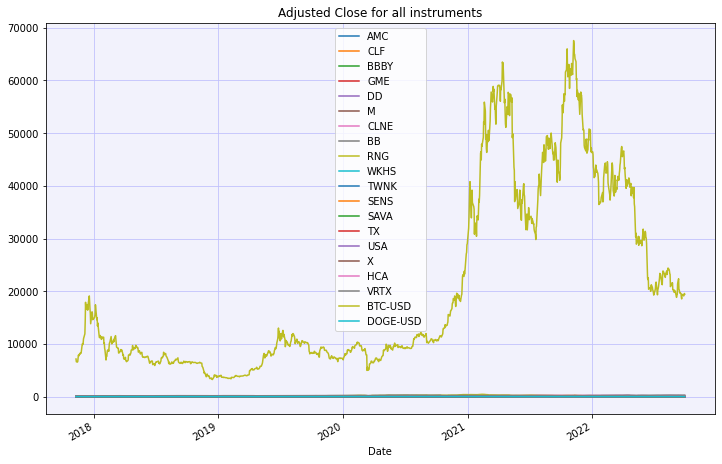

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
data_df.plot(ax = plt.gca(), grid = True)
ax.set_title('Adjusted Close for all instruments')
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))

No surprise, Bitcoin has experienced some ups and downs, but still dwarfs all other assets we're looking at right now. Besides the mismatching in scaling, what is wrong with this chart? What's wrong is we're looking at all of the assets in absolute prices. While the absolute price is important when assessing value, we are more concerned with the relative change of an asset (as well as its volatility).

Because crypto-currencies such as DOGE have been extremely volatile, we will plot their returns separately.

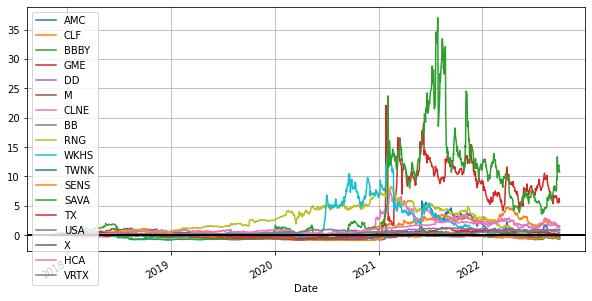

In [7]:
stock_df = data_df.drop(['BTC-USD', 'DOGE-USD'], axis = 1)
simple_returns = stock_df.apply(lambda x: x /x[0] - 1)
simple_returns.plot(grid = True, figsize = (10, 5)).axhline(y = 0, color = "black", lw=2)

As we can see, returns are extremely volatile, even for equities. This should be no surprise, considering these were all stocks that were popular with r/WallStreetBets. Either way, we will need find a rate of return for all our investments. This rate of return can either be represented as APR or APY.

### APR vs APY

**Annual Percentage Rate** and **Annual Percentage Yield** are often used interchangably, considering they're both expressed in terms of percentages, but they're used for different purproses. APR measures the cost of a loan, while APY measure the return on an investment. From the lender's perspective APR is the metric to use, but we will end up using both in our analysis.

However, one issue with using APR is that it doesn't take into account of compounding, while APY does. We will show how using **Logarithmic Return** is virtually the same as creating a compounding effect in our time series.

### Logarithm Returns

The effective annual interest rate is an essential tool that evaluates the real return on investment. If we assume the number of compounding periods in one year is $n$, the formula to convert the stated annual interest rate to the effective annual interest rate is 

$$r_{effective} = \big(1+\frac{r_{nominal}}{n}\big)^{n}-1$$

Now imagine the price of an asset is changing every millisecond. The period of compounding $n$ approaches infinity, and this is referred to as continuous compounding. The formula for continuous compounding is given below:

$$lim_{n\rightarrow\infty}\big(1+\frac{r}{n}\big)^{n}=e^{r}$$

From the equation above, we know that if we assume continuous compounding:

$$e^{r_{nominal}}=1+r_{r_{effective}}=\frac{P_{n}}{P_{n-1}}$$

Then we take $ln$ on both sides of the equation:

$$r_{nominal}=ln\bigg(\frac{P_{n}}{P_{n-1}}\bigg)=ln(P_{n})-ln(P_{n-1})$$

Here we have the logarithmic return, or the continously compounded return. This return is actually very close to the effective interest rate. If we rearrange the following equation:

$$e^{r_{nominal}}=1+r_{r_{effective}}$$

we will have

$${r_{effective}} = e^{r_{nominal}} - 1 \approx r_{nominal} $$

The second quality holds due to Taylor Expansion and the small interest rate. This is frequently used when calculating returns because once we take the logarithm of asset prices, we can calculate the logarithmic return by simple subtraction. 

### Why Use Logarithmic Returns?

The problem with simple returns is that they're just not symmetric. Simple returns, whether they're positive or negative, then to equal the magnitude and do not cancel each other out, resulting in a net change.

For example, if your portfolio goes up by 50% (say \\$100 to \\$150) and then declines by 50% (from \\$150 to \\$75), you're not back to where you started. While mathematically, you may have averaged a 0% return on your portfolio, it's not a very useful summary that you are now 25% below your principal investment.

$$ \frac{\big(\frac{(150-100)}{100}+\frac{(75-150)}{150}\big)}{2}=0\% $$

In other words, while you may have mathematically "broken even", in reality your portfolio is down 25%. As the saying goes, the stock market takes the stairs up and the elevator down.

Instead, we use Logarithmic returns in mathematical finance. One advantage of logarithmic returns is the symmetry involved. Log returns of equal manitude but opposite direction (positive and negative) will cancel each other out. This means that the same investment of \\$100 will indeed show a return of 0\%, which is helpful for our analysis.

Also, simple returns are not additive over time, and adding returns for multiple periods does not yield the total return over the total length of time. In other words, simple returns fail to satisfy the property of time value, which is fundamental for any financial analysis.

For example, if your portfolio goes from \\$100 to \\$110 in one year and then \\$112 the next year, your simple annual returns would be 10.0\% to 9.09\%, respectively. The sum of those returns would be 19.09\% which is not your actual total return of 20\%. ($19.09 \neq 20$)

On the other hand, logarithmic returns are additive over time. Consider the ordered sequence of $n$ trades. Calculating the compounding return, which is the running return of this sequence of trades over time:

$$(1+R_{1})(1+R_{2})\ldots(1+R_{n}) = \prod^{n}_{i}(1+R_{i}) $$

where $R_{i}$ is the return for each period. Taking the natural logarithm of this would give us the following:

$$
\begin{aligned}
ln\Big(\prod^{n}_{i}(1+R_{i})\Big) & = \sum^{n}_{i}ln\Big(1+R_{i}\Big) \\
& = ln(1+R_{i})+(1+R_{2})+ \ldots + (1+R_{n}) \\
& = ln(\frac{P_{1}}{P_{0}})+ln(\frac{P_{2}}{P_{1}})+ln(\frac{P_{3}}{P_{2}})+\ldots+ln(\frac{P_{n-1}}{P_{n-2}})+ln(\frac{P_{n}}{P_{n-1}}) \\
& = ln(P_{1})-ln(P_{0})+ln(P_{2})-ln(P_{1})+\ldots+ln(P_{n})-ln(P_{n-1}) \\
& = ln(P_{n}) - ln(P_{0}) \\
\end{aligned}
$$

As we can see, if we sum up the logarithmic returns $ln(\frac{P_{i}}{P_{j}})$ for each period, we end up with $ln(P_{n})-ln(P_{0})=ln(\frac{P_{n}}{P_{0}})$. In other words, the compound return over $n$ periods is merely the differene in log between initial and final periods.

Using our portfolio example, if your portfolio goes from \\$10 to \\$11 in one year and then to \\$12 the next year, your logarithmic returns $r$ over the period of two years would be:

$$r = ln(P_{2})-ln(P_{0})=ln(12)-ln(10)=0.18$$

which is the same as summing the logarithmic returns of each individual period:

$$ln(\frac{P_{1}}{P_{0}})+ln(\frac{P_{2}}{P_{1}})=ln(\frac{11}{10})+ln(\frac{12}{11})=0.18$$

$P_{2}$ can also be expressed as $e$ raised to the logarithmic return $r$:

$$
\begin{aligned}
P_{2} & = P_{0}(1+R_{1})(1+R_{2}) \\
& = P_{0}\prod^{2}_{i=1}(1+R_{i}) \\
& = P_{0}e^{ln(\frac{P_{2}}{P_{0}})}\\
& = P_{0}e^{ln(\frac{12}{10}})\\
& = 12 \\
\end{aligned}
$$

And, because the logarithmic returns are additive, the arithmetic mean of log returns is much more informative. The average log return, times the number of sub-periods, tells us the exact total compounded return over the period of time.

### Logarithm Return

Now that we understand the importance of log returns, we will calculate the log returns of our portfolio.



In [8]:
log_returns = data_df.pct_change()
log_returns

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Date,,,,,,,,,,,,,,,,,,,,
2017-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,-0.035088,-0.006623,-0.006451,-0.064351,-0.003702,0.024615,-0.004762,0.001859,-0.029443,0.026217,0.024570,0.007605,0.064607,0.016146,0.000000,0.013284,-0.009193,0.003847,-0.073554,-0.178092
2017-11-13,0.059091,0.010000,-0.014985,-0.013999,0.007003,-0.032532,-0.033493,-0.008349,-0.003250,0.072993,0.010392,0.000000,-0.002639,-0.001059,-0.003252,0.005827,-0.012328,-0.004773,-0.008862,0.041273
2017-11-14,0.047210,-0.034654,0.025355,-0.000617,-0.021547,0.019141,-0.024752,-0.027128,0.021739,0.020408,-0.000791,-0.015094,0.013228,-0.039943,-0.001632,-0.034396,-0.021362,-0.001419,0.011626,-0.022296
2017-11-15,0.028688,0.052992,-0.013353,-0.011736,0.005833,0.014213,0.025381,-0.006731,-0.012766,0.003333,-0.019794,0.003831,0.023499,0.000368,-0.004902,0.016498,-0.014727,0.005683,0.102444,0.130912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.145181,-0.014318,-0.044978,-0.022364,-0.013599,-0.032443,-0.052533,-0.019724,-0.006373,0.011278,-0.016681,0.007576,0.079293,-0.040531,-0.027923,-0.020979,-0.022245,-0.023532,-0.003885,-0.035477
2022-09-27,0.090776,0.039755,0.001570,0.067402,0.000799,0.040105,0.065347,0.024145,0.001727,0.011152,0.002969,0.000000,0.021908,0.022430,-0.008977,0.024176,-0.015648,0.028759,-0.005833,-0.007857
2022-09-28,0.029530,0.027941,0.012539,0.045159,0.023158,0.044880,0.055762,-0.019646,0.051958,0.069853,0.017336,0.045113,-0.050671,0.004388,0.030797,0.004828,0.030546,0.026937,0.016544,0.000231


Now we can plot all of the returns on the same axis without scaling issues.

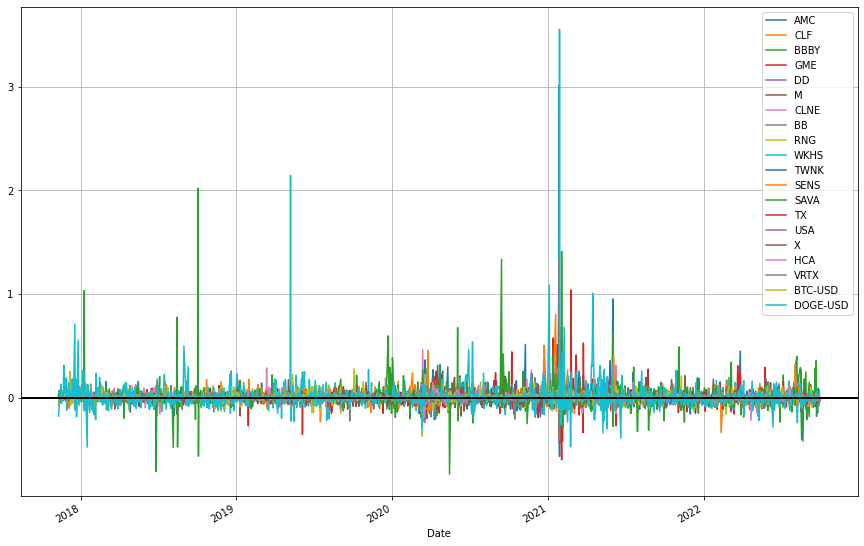

In [9]:
log_returns.plot(grid = True, figsize = (15,10)).axhline(y = 0, color = "black", lw=2)

Now that we have the log returns for each financial instrument, we can find the annualized returns for each financial instrument. We can get the annual returns by simply sum all the daily returns up.

In [10]:
APR = log_returns.groupby([log_returns.index.year]).agg('sum')
APR_avg = APR.mean()

APR

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Date,,,,,,,,,,,,,,,,,,,,
2017,0.319282,0.193701,0.117503,0.049852,0.020954,0.283965,-0.027666,0.048156,0.026506,-0.026505,0.199698,0.030662,0.124371,0.129098,0.052942,0.268554,0.105965,0.014491,0.838928,2.363588
2018,0.013513,0.198995,-0.514600,-0.134078,-0.225421,0.298659,0.024541,-0.367384,0.637784,-1.265451,-0.242209,0.181163,1.278481,-0.064875,-0.034156,-0.539472,0.393252,0.156808,-1.059485,-0.460700
2019,-0.356007,0.259581,0.645607,-0.413062,-0.093506,-0.391751,0.463588,-0.006624,0.807603,3.392095,0.305427,-0.794182,2.244699,-0.099735,0.343089,-0.287362,0.220643,0.314603,0.889334,0.060381
2020,-0.293860,0.912590,0.623036,1.791535,0.255500,0.055006,1.813528,0.282009,1.023098,2.587053,0.046794,0.544514,2.277395,0.427211,0.231289,0.698847,0.295764,0.185565,1.680002,1.304168
2021,5.790780,0.611148,0.461190,4.973412,0.186398,1.081416,0.199510,0.868557,-0.579882,-0.879537,0.357273,1.954119,3.653424,0.566393,0.315585,0.564664,0.491003,-0.039154,0.775613,7.859128
2022,-0.782203,-0.337514,-0.039788,0.016453,-0.415544,-0.319002,0.071757,-0.567936,-1.319802,-0.049928,0.155768,-0.313453,0.404867,-0.338179,-0.309394,-0.146150,-0.251554,0.312780,-0.693345,-0.690936


In [11]:
pd.DataFrame(APR_avg, columns = ['Average APR']).T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Average APR,0.781917,0.306417,0.215491,1.047352,-0.04527,0.168049,0.42421,0.042796,0.099218,0.626288,0.137125,0.267137,1.663873,0.103319,0.099892,0.09318,0.209179,0.157515,0.405174,1.739272


It may sound wrong to sum up the daily returns, but we can prove that it's mathematically correct. Let's assume the stock prices in a period of time are represented by $[p_{0},p_{1},\ldots,p_{n}]$. Then the cumulative rate of return is given the same equation we have shown above:

$$1+r_{effective}\approx1+r_{nominal}=ln(\frac{P_{1}}{P_{0}})+ln(\frac{P_{2}}{P_{1}})+ln(\frac{P_{3}}{P_{2}})+\ldots+ln(\frac{P_{n-1}}{P_{n-2}})+ln(\frac{P_{n}}{P_{n-1}})$$

According to the equation above, we can sum up these logarithmic returns within a given period to get the cumulative return. The convenience of this method is also one of the reasons why we use logarithmic returns in quant finance.


Now we have much more meaningful information rather than starring at ambiguous charts. Now we will derive the APY from the same data. We can calculate APY with the following formula:

$$APY = \big(1+\frac{i_{nom}}{N}\big)^{N}-1$$

where $i_{nom}$ is the nominal interest rate and $N$ is the number of compounding periods of per year.

In [12]:
N = np.array(tr_days_per_year.T)
N_total = np.sum(N)
APY = (1 + APR / N)**N-1
APY_avg = (1 + APR_avg/N_total)**N_total - 1

APY

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Date,,,,,,,,,,,,,,,,,,,,
2017,0.374149,0.213085,0.124463,0.051078,0.021168,0.326865,-0.027297,0.049299,0.026850,-0.026167,0.220341,0.031123,0.132187,0.137531,0.054326,0.306732,0.111605,0.014593,1.291098,8.847332
2018,0.013604,0.220079,-0.402576,-0.125509,-0.201901,0.347811,0.024843,-0.307643,0.890752,-0.718789,-0.215200,0.198532,2.579546,-0.062823,-0.033582,-0.417282,0.481336,0.169713,-0.654142,-0.369425
2019,-0.299709,0.296213,0.905571,-0.338603,-0.089284,-0.324333,0.589091,-0.006603,1.239632,28.063050,0.356953,-0.548616,8.344247,-0.094941,0.408966,-0.249883,0.246758,0.369446,1.429702,0.062234
2020,-0.254747,1.486680,0.863152,4.960903,0.290941,0.056541,5.092503,0.325583,1.776065,12.117083,0.047902,0.722762,8.652398,0.532424,0.260090,1.009495,0.343921,0.203817,4.335852,2.672300
2021,305.509241,0.841183,0.585292,136.685354,0.204819,1.942037,0.220707,1.379913,-0.440410,-0.585663,0.429065,6.004703,36.607141,0.760780,0.370790,0.757746,0.633174,-0.038401,1.169337,2295.327591
2022,-0.543349,-0.286674,-0.039010,0.016588,-0.340322,-0.273323,0.074380,-0.433793,-0.734053,-0.048709,0.168480,-0.269273,0.498450,-0.287149,-0.266295,-0.136021,-0.222539,0.366865,-0.500739,-0.499530


In [13]:
pd.DataFrame(APY_avg, columns = ['Average APY']).T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Average APY,1.185117,0.358497,0.240448,1.848826,-0.044261,0.182981,0.52827,0.043725,0.104302,0.870356,0.146963,0.306182,4.273791,0.10884,0.105047,0.097656,0.232644,0.170587,0.499464,4.68621


As we can see, APY is larger than APR, as APY takes compounding into consideration. We will primarily be using APY to measure the returns of different investments.

### Volatility / Variance / Standard Deviation

By reading this notebook, I'll already assume that you understand concepts like volatility, variance, and standard deviation, so I won't spend too much time on it. Variance is a measurement of dispersion. In finance, variance is usually synonymous with risk. The higher the variance, the greater the risk. We represent the risk, or the reward standard deviation, with the symbol: sigma $(\sigma)$.

We calculate variance with the following equation:

$$Var(R)=\sigma^{2}=\frac{\sum^{n}_{i=1}(x_{i}-\mu)^{2}}{n}$$

Then, as always, the standard deviation is just the square root of the variance

$$\sigma = \sqrt(\sigma^{2})$$

Calculating the variance for our dataset is just as simple as calculating the average.

In [14]:
STD = log_returns.groupby([log_returns.index.year]).agg('std') * np.sqrt(N)
STD_avg = STD.mean()
std = log_returns.std()

STD

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Date,,,,,,,,,,,,,,,,,,,,
2017,0.220565,0.183237,0.221731,0.131803,0.057254,0.161736,0.114966,0.154313,0.136685,0.182213,0.114372,0.205076,0.128029,0.086873,0.032355,0.116204,0.102872,0.081911,0.503675,1.048447
2018,0.432705,0.521096,0.460606,0.484174,0.276186,0.413381,0.617873,0.411403,0.458132,0.787518,0.345632,0.648267,2.745737,0.351978,0.188148,0.468649,0.257291,0.338878,0.768911,1.358696
2019,0.448191,0.531097,0.597720,0.716918,0.342987,0.414762,0.574677,0.429792,0.441143,2.425045,0.205089,0.691425,0.992082,0.346038,0.130597,0.583210,0.267603,0.268652,0.694175,0.649491
2020,1.403637,0.819863,1.075572,1.184659,0.511504,0.928136,1.124846,0.700887,0.650353,1.221019,0.282543,1.152877,2.096845,0.540436,0.461860,0.786865,0.608776,0.461328,0.724785,1.000601
2021,3.528605,0.649758,1.187698,2.694811,0.294038,0.679917,0.974039,1.021758,0.499991,1.091671,0.221655,1.412210,2.151014,0.421381,0.221651,0.655333,0.271418,0.261513,0.785985,4.246155
2022,1.067504,0.532843,1.300501,0.923147,0.286076,0.589043,0.647308,0.488934,0.662463,0.860305,0.230416,0.879354,0.967522,0.409817,0.263274,0.491732,0.379241,0.268804,0.579754,0.788260


In [15]:
pd.DataFrame(STD_avg, columns = ['Average STD']).T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Average STD,1.183535,0.539649,0.807305,1.022585,0.294674,0.531163,0.675618,0.534514,0.474794,1.094628,0.233285,0.831535,1.513538,0.359421,0.216314,0.516999,0.314533,0.280181,0.676214,1.515275


The following table shows the overall risk of each financial instrument. As we can see, AMC, GMEand DOGE is among the most volatile, which should surprise no one. TWNK and SAVA are also very volatile but are not as popular. As mentioned previously, the larger the standard deviation, the greater the risk. However, this is probably difficult to see from a table, and we can plot the values to see the dispersion.

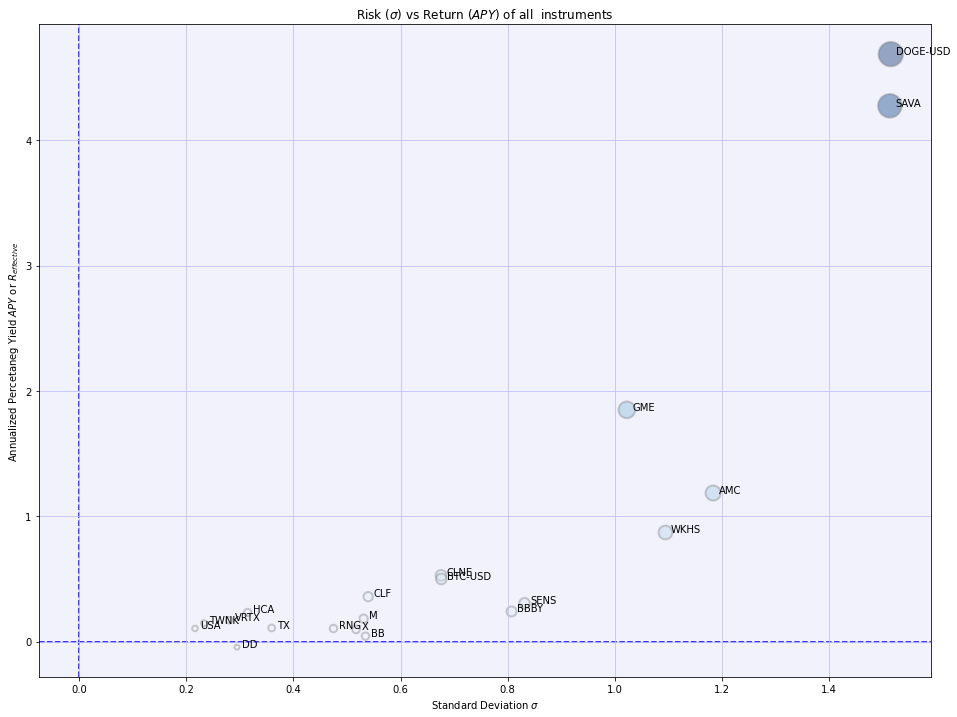

In [16]:
# configuration - generate different colors & sizes
c = [y + x for y, x in zip(APY_avg, STD_avg)]
c = list(map(lambda x : x /max(c), c))
s = list(map(lambda x : x * 600, c))


# plot
fig, ax = plt.subplots(figsize = (16,12))
ax.set_title(r"Risk ($\sigma$) vs Return ($APY$) of all  instruments")
ax.set_facecolor((0.95, 0.95, 0.99))
ax.grid(c = (0.75, 0.75, 0.99))
ax.set_xlabel(r"Standard Deviation $\sigma$")
ax.set_ylabel(r"Annualized Percetaneg Yield $APY$ or $R_{effective}$")
ax.scatter(STD_avg, APY_avg, s = s , c = c , cmap = "Blues", alpha = 0.4, edgecolors="grey", linewidth=2)
ax.axhline(y = 0.0,xmin = 0 ,xmax = 5,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 40,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
for idx, instr in enumerate(list(STD.columns)):
  ax.annotate(instr, (STD_avg[idx] + 0.01, APY_avg[idx]))

As we we can, DOGE and SAVA yield the greatest return on investment, but have the greatest amount of risk involved. We've also seen big gains on popular meme stocks such as GME and AMC. We haven't seen a lot of meme stocks with lots of volatility, which is intersting because assets that are discussed frequently on r/WallStreetBets tend to experience a lot of momentum. Regardless, these were the assets that were the most popular a year or so ago, so we're going to keep using these as our example.

Now that we have a bigger idea of what we're dealing with, we're going to attempt to analyzing the systematic risk and the expected return of our meme stock portfolio, as well as creating the optimal portfolio by using a method known as CAPM.

## Capital Asset Pricing Model

The **Capital Asset Pricing Model** (CAPM) is a classic measure of the cost of capital. It is often used in finance to evaluate the price of assets and to assess the impact of the risk premium from the market at large.

In general, portfolios and assets can face two types of risk: idiosyncratic and systematic risk. Idiosyncratic risk refers to the risks that are firm-specific and can be diversified away, such as supply-chain issues or faulty production. Systemic risk is market-wide and affects all market participants, such as a stalling economy or interest rate changes. Because all firms are exposed to systematic risk, it cannot be diversified away.

### The Theory

We can express the CAPM more clearly like so:

$$E[R_{i}]=R_{F}+\beta(E[R_{M}]-R_{F})$$

where $R_{i}$ is the return of asset $i$, $R_{F}$ is the risk-free rate, and $R_{M}$ is the return of the market. The CAPM is one of the most basic measures of the cost of capital. It determiens the minimum return required to entice investors to hold a certain asset.

To put it another way, CAPM says that the return of an asset should be the risk-free rate, which is what we would demand to account for inflation adn the time value of money, as well as something extra to compensate us for the amount of systematic risk we are exposed to.

### CAPM Assumptions

There are many different assumptions involved with CAPM, however, we are going to focus to two main assumptions:

* We assumed that investors are able to trade without delay or cost and that everyone is able to borrow or lend money at the risk free rate.
* We assumed that all investors are "mean-variance optimizers." This essentially means that they would only demand portfolios with the highest return attainable for the given level of risk. These portfolios are along what we call the **efficient frontier.**

## Descriptive/Financial Statistics Analyisis

We're going to be calculating the alpha ($\alpha$) and the beta ($\beta$) of a given portfolio. What is the purpose of $\alpha$ and $\beta$? It can be derived from the expanded CAPM formula, which is shown here:

$$E[R]-R_{f}=\alpha+\beta*(E[R_{m}]-R_{f})+\epsilon$$

$\alpha$, a measurement of performance, can be derived from the following:

$$\alpha=(\bar{E[R]}-R_{f})-\beta*(\bar{E[R_{m}]}-R_{f})$$

$\beta$, a measurement of systematic risk, which can be found with a simple regression. We can be derived $\beta$ from the following formula:

$$\beta=\rho_{i, m}\frac{\sigma}{\sigma_{m}}$$

where $\rho_{i,m}$ is the covariance between two different assets, namely a single stock and the market index. 

$$\rho_{i,m}=\frac{Cov_{i,m}}{\sigma*\sigma_{m}}$$

We're going to create two functions. Mainly for the purpose of visualization, so I won't go into detail explaining what they do.

In [17]:
def visualize_statistic(statistic, title, limit = 0):
  # configuration
  fig, ax = plt.subplots(figsize = (15,8))
  ax.set_facecolor((0.95, 0.95, 0.99))
  ax.grid(c = (0.75, 0.75, 0.99), axis = 'y')
  colors = sns.color_palette('Reds', n_colors = len(statistic))
  # visualize
  barlist = ax.bar(x = np.arange(len(statistic)), height =  statistic)
  for b, c in zip(barlist, colors):
    b.set_color(c)
  ax.axhline(y = limit, xmin = -1 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

  # configure more
  for i, v in enumerate(statistic):
      ax.text( i - 0.22,v + 0.01 , str(round(v,3)), color = 'blue', fontweight='bold')
  plt.xticks(np.arange(len(statistic)), instruments)
  plt.title(r"{} for every instrument (i) against market (m) S&P500".format(title))
  plt.xlabel(r"Instrument")
  plt.ylabel(r"{} value".format(title))
  plt.show()

def visualize_model(alpha, beta, data, model):
  fig, axs = plt.subplots(5,4, figsize = (14,10),  constrained_layout = True)
  # fig.tight_layout()
  idx = 0
  R_m = data["^GSPC"]
  del data["^GSPC"]
  for a, b, instr in zip(alpha, beta, data):
    i, j = int(idx / 4), idx % 4
    axs[i, j].set_title("Model : {} fitted for '{}'".format(model, instr))
    axs[i, j].set_facecolor((0.95, 0.95, 0.99))
    axs[i, j].grid(c = (0.75, 0.75, 0.99))
    axs[i, j].set_xlabel(r"Market (S&P500) log returns")
    axs[i, j].set_ylabel(r"{} log returns".format(instr))

    R = data[instr]
    y = a + b * R_m
    axs[i, j].scatter(x = R_m, y = R, label = 'Returns'.format(instr))
    axs[i, j].plot(R_m, y ,color = 'red', label = 'CAPM model')
    idx += 1

We're also going to create a new list of tickers for the portfolio we are going to construct.

In [18]:
instruments = list(log_returns.columns)
instruments

['AMC',
 'CLF',
 'BBBY',
 'GME',
 'DD',
 'M',
 'CLNE',
 'BB',
 'RNG',
 'WKHS',
 'TWNK',
 'SENS',
 'SAVA',
 'TX',
 'USA',
 'X',
 'HCA',
 'VRTX',
 'BTC-USD',
 'DOGE-USD']

We need to incorporate the risk-free rate, $R_{f}$, into our model. We're going to use the `DataReader` method to import the 13-week Treasury Bill (IRX). We also need to import data for the S&P 500, which is a proxy for the market return, $R_{M}$.

Afterwards, we will utilize the same methods we used to calculate annualized returns for our portfolio and we're going to include them in our average return/risk table.

In [19]:
# [*] Risk-Free Asset : 13 Week Tbill (^IRX). Get the most recent value
risk_free = web.DataReader('^IRX', data_source = 'yahoo', start = start, end = end)['Adj Close']
risk_free = float(risk_free.tail(1))

print("Risk-Free rate (Daily T-bill) = {}".format(risk_free))

# [*] Market          : S&P 500 index (^GSPC) | Yahoo Finance for index pricing, '^GSPC' is the underlying for 'SPX' options.
market = web.DataReader('^GSPC', data_source = 'yahoo', start=log_returns.index[0], end=end)['Adj Close']
market = market.rename("^GSPC")
market_log_returns = market.pct_change()
log_return_total = pd.concat([log_returns, market_log_returns], axis = 1).dropna()

# Descriptive statistics
# Return
log_returns_total = pd.concat([log_returns, market_log_returns], axis=1).dropna()
APR_total = log_returns_total.groupby([log_returns_total.index.year]).agg('sum')
APR_avg_total = APR_total.mean()
APR_avg_market = APR_avg_total['^GSPC']
# RISK
STD_total = log_return_total.groupby([log_return_total.index.year]).agg('std') * np.sqrt(N)
STD_avg_total = STD_total.mean()
STD_avg_market = STD_avg_total['^GSPC']

Risk-Free rate (Daily T-bill) = 3.179999828338623


In [20]:
pd.DataFrame(APR_avg_total, columns = ['Average APR']).T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,...,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD,^GSPC
Average APR,0.781917,0.306417,0.215491,1.047352,-0.04527,0.168049,0.42421,0.042796,0.099218,0.626288,...,0.267137,1.663873,0.103319,0.099892,0.09318,0.209179,0.157515,0.405174,1.739272,0.073327


In [21]:
pd.DataFrame(STD_avg_total, columns = ['Average STD']).T

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,...,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD,^GSPC
Average STD,1.183535,0.539649,0.807305,1.022585,0.294674,0.531163,0.675618,0.534514,0.474794,1.094628,...,0.831535,1.513538,0.359421,0.216314,0.516999,0.314533,0.280181,0.676214,1.515275,0.16678


So we see that the risk-free rate is currently trending around 3.18%. We've calculated the market return for the last 5 years, which is roughly 7.81%. Compared to our selection of meme stocks, that may not seem like a lot. The vast majority of stocks in our portfolio yield a minimum of 10% or more, and GME and DOGE have yielded +100% within the last 5 years. However, it would be foolish to only look at the upside without considering the downside.

Consider $\sigma$, or proxy for our asset's annualized risk/volatility. The market risk is ~16%. Relative to its return, it may seem like it's risky to hold your money in the S&P 500; however, take a look at our meme stock portfolio. A lot of the stocks are very risky. The question is, how risky?

We can visualize the alpha and beta with the previously created functions using the mathematical formulas we derived earlier.

In [22]:
corr = log_returns.corrwith(market_log_returns)
r_squared = corr ** 2

def CAPM():
  # 1 - Calculate average Risk Premium for every instrument  
  # [*]  _
  #     E[R] - R_f
  # [*]   __
  #     E[R_m] - R_f
  APR_premium        = APR_avg - risk_free
  APR_market_premium = APR_avg_market - risk_free

  # 2 - Calculate α, β
  beta  = corr *  STD_avg / STD_avg_market
  alpha = APR_premium - beta * APR_market_premium 
  
  return alpha, beta

alpha, beta = CAPM()

The baseline of $\alpha$ is 0. An $\alpha$ of 0 implies that the investment earned a return that matched the overall market return, as reflected by the selected benchmark index (or benchmark is the S&P 500). When $\alpha$ is negative, the portfolio underperformed the benchmark index; positive $\alpha$ indicates the opposite.

So essentially, $\alpha$ greater than 0 means that an asset has "beat" the market, but by how much? Since 0 is our benchmark, a 1 unit increase in $\alpha$ means that a stock "outperformed" its benchmark by roughly 1%. Investors in mutual funds or ETFs often look for a fund with a high alpha to get a superior return on investment.

What can we say about $\beta$? Earlier, we mentioned that $\beta$ is a measure of systematic risk, but mathematically it is derived from a regression analysis. This means that $\beta$ also measures correlation, not just with other stocks but with the broader market. 

A $\beta$ greater than 1 indicates that the asset is more volatile than the market; $\beta$ less than 1 but greater than 0 indicates that the asset is less volatile than the broader market. If an asset has $\beta$ less than 0 (very rare), it means that the asset is negatively correlated with the market. These assets offer a great hedge against market volatility. Of course, when $\beta \approx 0$, we can say that the asset is uncorrelated with the market; however, it is highly unlikely that you'll come across an asset like this, at least if the asset we're talking about stocks. Most research suggests that the vast majority of stocks are positively correlated with the market.

So how does our meme stock portfolio perform?

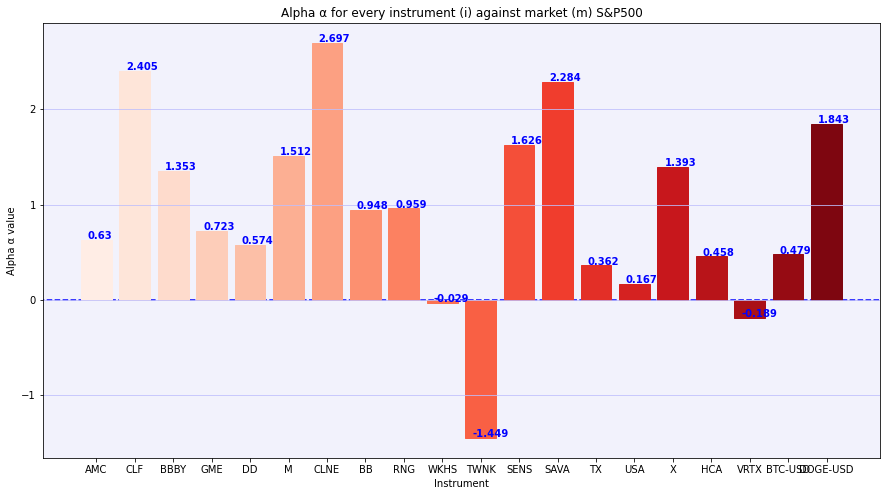

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Average α,0.630232,2.404753,1.353394,0.722527,0.573957,1.512051,2.697135,0.94768,0.958793,-0.029312,-1.449014,1.626305,2.284017,0.361592,0.166555,1.393116,0.457841,-0.189046,0.478573,1.843163


In [23]:
visualize_statistic(alpha.values, "Alpha α")

pd.DataFrame(alpha, columns = ["Average α"]).T

As we can see, most of the stocks in our portfolio outperform the S&P 500 by a modest margin. Out of the 20 assets, 8 of them outperform our benchmark at least 1%, and 3 have underperformed our benchmark. If we average the $\alpha$, it comes out to 0.9386, which means that our meme stock portfolio only outperforms the S&P by 0.93% (I got this figure by simply averaging the $\alpha$ for each asset). So, should you invest in a portfolio like this? I suppose it "depends" on your income goals and overall suitability (after all, this isn't investment advice).

If I'm a college student, probably majoring in economics/finance with an interest in quant finance, and I'm just experimenting with investment strategies, I might be grateful that my strategy is at least slightly better than the S&P. However, if I'm a grown adult looking generate wealth, I don't think I would be satisfied with 0.93%, which barely accounts for management fees.

Granted, those who consider meme stocks a sound investment are usually self-taught and were first introduced to investing during the AMC/GME/DOGE craze. Needless to say, they are probably managing their own portfolios (no management fees for them). It may be difficult to quantitatively comprehend the idea of an $\alpha$ 0.93, especially when so many assets can perform much better.

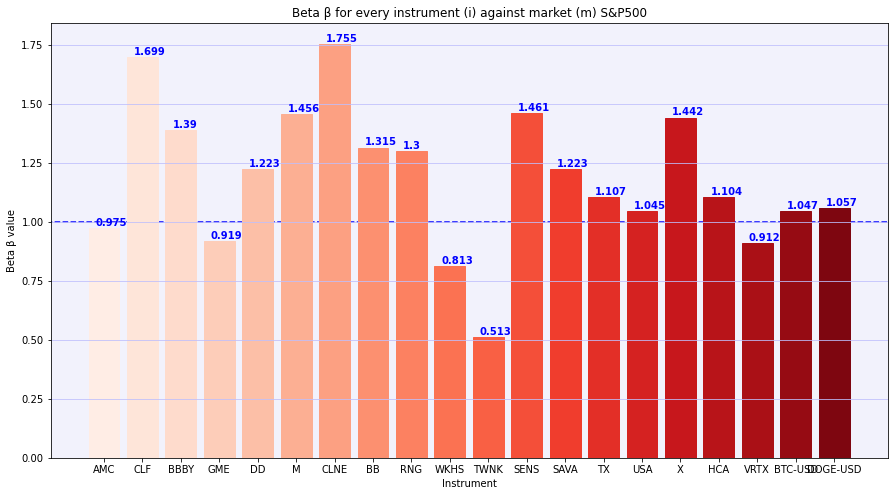

,AMC,CLF,BBBY,GME,DD,M,CLNE,BB,RNG,WKHS,TWNK,SENS,SAVA,TX,USA,X,HCA,VRTX,BTC-USD,DOGE-USD
Average β,0.974778,1.699032,1.38988,0.919046,1.222925,1.456221,1.75523,1.314874,1.30029,0.812574,0.513044,1.461103,1.22322,1.106738,1.045061,1.442037,1.103644,0.912049,1.047229,1.057045


In [24]:
visualize_statistic(beta.values, "Beta β", limit = 1)

pd.DataFrame(beta, columns = ["Average β"]).T

As mentioned before, most assets (especially stocks) are positively correlated with the broader market. Most of the assets in our portfolio have $\beta$ greater than 1, which means they are more volatile than the overall market. As we see, CLF has a $\beta$ of 1.7, which means we can expect this stock to increase by 1.7% for every 1% increase in the broader market.

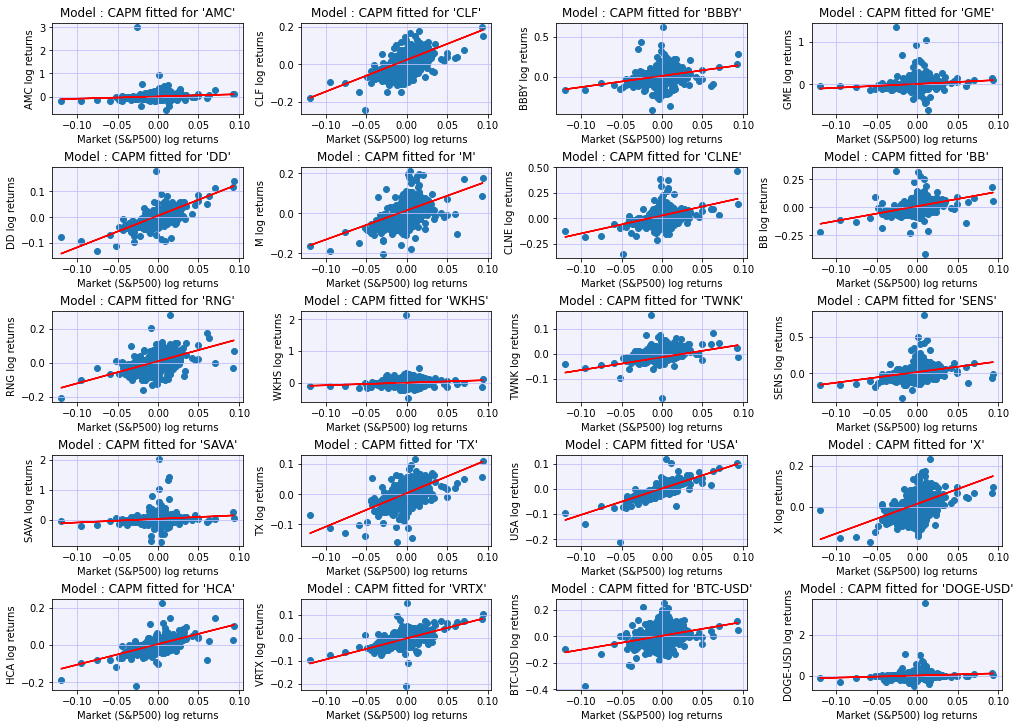

In [25]:
visualize_model(alpha/100, beta, data= log_return_total.copy(), model = 'CAPM')

## Portfolio Optimization

We have shown that our meme stock portfolio outperforms the S&P 500 by 0.93%, but that doesn't mean it will typically outperform our benchmark by this amount. This amount can change, based on the size of our portfolio, as well as how we weigh each asset. We can figure out how to best do this, by utilizing the **Modern Portfolio Theory** (MPT). The MPT is a method for selecting investments in order to maximize their overall returns within an acceptable level of risk.

We've actually utilized this method on more traditional securities in a [different project](https://github.com/KidQuant/401K-Optimization-Using-Modern-Portfolio-Theory/blob/master/401K%20Optimization%20Using%20Modern%20Portfolio%20Theory.ipynb), so I won't go too much into the theory or mathematical concepts here. If you want to learn more about how the code works, you can review the notebook I've provided.

One theoretical concept regarding MPT that I will address here is that MPT assumes that investors are rational and avoid risk whenever possible. However, we're looking at a portfolio primarily of meme stocks and other assets. One may not believe that an investor of this portfolio is risk-averse or rational; however, regardless of the assets one decides to invest in, they should be aware of the level of risk they take.

For the purpose of this experiment, we're going to assume anyone who invests in this portfolio wants to maximize their return and minimize their risk.

In [26]:
from ipynb.fs.full.MPT_Functions import portfolio_annualized_performance
from ipynb.fs.full.MPT_Functions import random_portfolios
from ipynb.fs.full.MPT_Functions import display_simulated_ef_with_random

What we did was we borrowed three functions from another notebook. If you wish to understand how they work, refer to the *401K Optimization Using Modern Portfolio Theory* project.

We're going to find the potential returns for 100,000 potential portfolios. We'll use use the `portfolio_annualized_performance` to calculate the the portfolio returns, $R_{p}$, and the risk, $\sigma$ for each theoretical portfolio. The `random_portfolios` function will create random portfolios by assigning weights for each asset. We're working with 20 different assets, so the possibilities are nearly endless.

Finally, we will use the `display_simulated_ef_with_random` function to simulate 100,000 potential portfolio returns with their risk. The function will also provide the optimal asset allocation based on whether the investor is seeking the greatest return or the least amount of risk. Essentially, we are trying to find the most efficient portfolio possible.

How do we measure the efficiency? We measure it with another formula known as the **Sharp Ratio**. The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. The sharpe ratio can be calculated by the following:

$$Sharpe Ratio=\frac{R_{p}-R_{f}}{\sigma_{p}}$$

The greater the Sharpe ratio, the better, as it indicates that an instrument's returns are large relative to its risk. Also, the greater the Sharpe ratio, the higher the earnings on average than the risk-free rate.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.84
Annualized Volatility: 0.51


Symbols      AMC   CLF  BBBY    GME    DD     M  CLNE   BB  RNG  WKHS   TWNK  \
allocation  6.43  6.71  0.85  10.85  0.01  0.71  4.36  5.7  0.5  4.69  11.16   

Symbols     SENS   SAVA    TX   USA     X   HCA  VRTX  BTC-USD  DOGE-USD  
allocation   0.8  10.03  1.69  3.11  2.81  5.05   3.7     9.66     11.17  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.3
Annualized Volatility: 0.3


Symbols      AMC   CLF  BBBY   GME    DD     M  CLNE    BB  RNG  WKHS  TWNK  \
allocation  0.87  0.07  7.54  0.98  4.63  2.03  4.66  1.39  8.0  3.12  6.66   

Symbols     SENS  SAVA     TX    USA     X   HCA  VRTX  BTC-USD  DOGE-USD  
allocation  1.23   2.5  12.37  10.52  7.19  6.46  11.9     6.76      1.12  


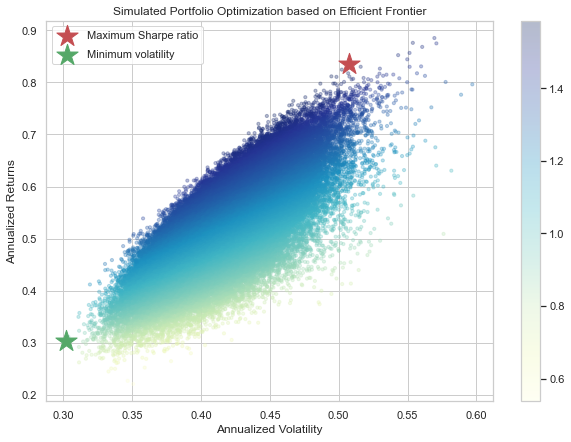

In [27]:
df = web.DataReader(instruments, data_source='yahoo', start=log_returns.index[0], end=end)['Adj Close']

df
    
returns = log_returns
mean_returns = returns.mean()
cov_matrix = log_returns.cov()
num_portfolios = 100000
risk_free_rate = risk_free /100

display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Now we've allocated all 20 of our assets based on our risk tolerance. As you can see, our program has plotted 100,000 unique portfolios, with annualized returns ($\alpha$) on our y-axis and annualized volatility ($\beta$) on our x-axis. It's possible to select a random portfolio inside the curve, but there will always be some portfolio out there, with the same number of assets, that will outperform in terms of returns and risk. The optimal or efficient portfolio will always exist somewhere on the edge of the curve, hence, the efficient frontier.

If we want the least about of risk possible, using our selected 20 instruments, we should allocate most of our funds towards BBBY, RNG, TWNK, TX, USA, X, HCA, VRTX, and BTC. These 9 instruments will comprise 77.4% of the portfolio. By allocating the portfolio in this way and prioritizing risk, we will achieve an excess annualized return (our $\alpha$) and volatility of 0.3.

What if we only care about maximizing return? If we want the greatest return possible, using the same 20 instruments, we should allocate most of our funds towards AMC, CLF, GME, BB, TWNK, SAVA, HCA, BTC, and DOGE. These assets will comprise ~75% of our portfolio. Using this optimal portfolio allocation which prioritizes returns, our portfolio achieves an annualized return of 0.84, with a volatility of 0.51.

So compared to the descriptive statistical analysis we've used earlier, we've actually **OVERSTATED** our return for this portfolio. Using the most optimal allocation method possible, with thousands of different possibilities, we find that our meme stock portfolio still barely *outperformes* our benchmark.

In practical terms, it would be difficult for a serious investor to justify building a portfolio with these 20 assets when there are so many different investments out there that could do significantly better for the least amount of risk. This is especially true if you're trying to avoid investing in assets that appear to be overvalued, such as Bitcoin and GameStop.

## Lessons From The Meme-Stock Craze

I doubt this analysis will convince anyone apart of r/WallStreetBets, TradeRS, or anyone sympathetic to the meme-stock trading "revolution." Much has been written about the heroic campaign by individual investors to slay giant institutional investors. It's easy to understand why this narrative is compelling, so I doubt anyone would want to listen to someone with institutional experiences, such as myself. Regardless, there are still valuable lessons that can be learned from the meme-stock craze, and the effort to democratize financial markets misses the market on many of these lessons.

First, it's dangerous for investors to follow crowds in stock markets or any need. r/WallStreetBets initiated campaigns to inflate asset prices past their intrinsic value or their long-term fundaments, making opportunities such as GameStop, AMC, and Bed, Bath & Beyond appear to be attractive investment opportunities. But those who bought these stocks close to their peaks are already nursing losses as the shares have come down. Overpaying for stock prices that don't reflect business fundamentals isn't courageous. Many who bought into the hype are already learning this painful lesson on the risk of market fads.

Second, the Federal Reserve has played an unwitting role creating an enviroment where the meme-stock challenge can happen. In the Fed's efforts to stabilize the economy, money has become virtually free. Ultralow interest rates encourages people to borrow and to take bigger risk to seek better returns. As a result, we've seen record sums of money being pumped into SPACS (special purpose  acquisition corporations) and private equity funds. As more money chases more opportunity, there are more instances of companies coming to market without being fully-vetted.

Third, the cheap money also fuels record retail trading activity. We've seen this movie before, and it rarely ends well; for those of us who remember the dot-com frenzy in the late 1990s and the mortgage bubble that led to the 2008 financial crisis. With the Fed increasing interest rates to combat persistently high inflation, they will have to reluctantly deflate any bubbles that have emerged. We're venturing onto uncharted territory, where our rookie investors now have to learn to generate alpha in an environment without cheap money and a zero-lower bound.

As such, quality is the best recipe for returns. Focusing on high-quality companies is a good defence against irrational market moves. And companies that enjoy strong organic growth drivers aren't beholden to the hypercompetitive M&A market for growth. Building an equity portfolio based on businesses with sustainable earnings growth is a recipe for consistent outperformance and reduced volatility, even in a world where smaller investors can mount powerful campaigns to shock market leaders.